#Predicting Healthcare Insurance Expenses using Linear Regression

The goal of this project is to explore and analyze a healthcare insurance dataset to understand factors influencing medical charges.

##EDA and Visualization
Goal : explore data, detect patterns, outliers and insights before modelling.

####Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.express as px
!pip install kagglehub[pandas-datasets]

####Loading Dataset

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "insurance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arunjangir245/healthcare-insurance-expenses",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

Using Colab cache for faster access to the 'healthcare-insurance-expenses' dataset.
First 5 records:    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


###Data Understanding

In [ ]:
print('Dataset Shape: ', df.shape)

Dataset Shape:  (1338, 7)


In [ ]:
print('Dataset columns:',df.columns)

Dataset columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
print('Columns data types: ')
df.dtypes

Columns data types: 


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


Statistical description of the dataset's numerical columns

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:
- Charges are highly right skewed
- Most individuals have 0-2 childern
- Most individuals have a BMI that is considered overweight\obese (BMI >=30)

###Data Preparation

####Counting Missing Values

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


We can see the dataset has no missing values

####Counting Duplicated Values

In [ ]:
df.duplicated().sum()

np.int64(1)

The dataset only has 1 duplicated row

####Locating the duplicate row

In [ ]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


####Removing duplicated rows

In [ ]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [ ]:
df.shape

(1337, 7)

###Understanding the Target Variable: Charges

In [ ]:
fig = px.histogram(df, x="charges", nbins=50,title= "Distribution of Charges")
fig.show()

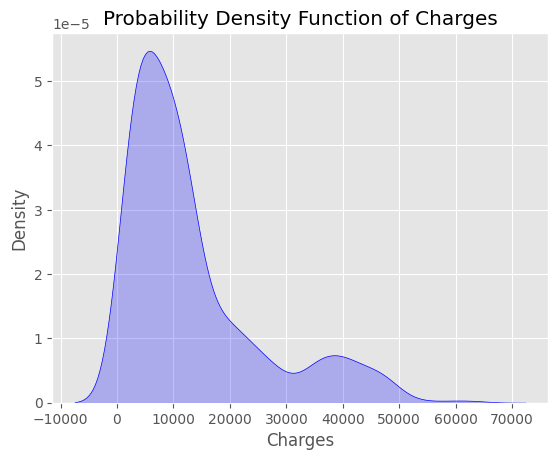

In [ ]:
ax = sns.kdeplot(df['charges'], fill=True, color='b')
ax.set_title('Probability Density Function of Charges')
ax.set_xlabel('Charges')
ax.set_ylabel('Density')
plt.show()

As previously observed, charges are highly right skewed

This can be handled with log transformation.

####Detecting Outliers

In [ ]:
fig= px.box(df, y= "charges", title= 'Charges Boxplot')
fig.show()

I used a box plot to statistically describe the distribution of charges through its quartiles.

The ends of the box describe the lower and upper quartiles.

The median (second quartile) is marked by a line inside the box.

Outliers are plotted individually.

###Feature Understanding

####Age

In [ ]:
fig = px.histogram(df, x='age', title='Age Distribution', nbins=64)
fig.show()

We can see that ages 18-19 dominate the dataset (highest count).

####BMI

In [ ]:
px.histogram(df, x='bmi', title='BMI Distribution',nbins=50)

####Smoker

In [ ]:
fig=px.histogram(df, x='smoker', title='Smoker Distribution')
fig.show()

We can see that there is a data imbalance in the smoker column.

####Children

In [ ]:
fig= px.histogram(df, x='children', title='Children Distribution')
fig.show()

Most individuals in the dataset have 0 children.

####Sex

In [ ]:
fig = px.histogram(df, x='sex', title='Sex Distribution')
fig.show()

The dataset is balanced between male and female.

####Region

In [ ]:
fig = px.histogram(df, x='region', title='Region Distribution')
fig.show()

####Detecting Outliers

In [ ]:
fig = px.box(df, y=['age', 'bmi', 'children'])
fig.show()

###Feature Relations

In [ ]:
fig = px.scatter(df, x='age', y='charges', color='smoker', title='Age vs Charges')
fig.show()

In [ ]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', title='BMI vs Charges')
fig.show()

We can see here that there's no strong relation between BMI and charges for nonsmokers, while for smokers there is a trend where smokers with higher BMI have higher charges.

In [ ]:
fig =px.scatter_3d(df, x='age', y='bmi', z='charges', color='smoker', title='Age, BMI, Charges')
fig.show()

Smokers have higher expenses.

In [ ]:
fig = px.bar(df.groupby('region')['charges']\
.agg(['mean'])\
.sort_values(by='mean')\
.reset_index(),
x='region', y='mean', title='Mean Charges by Region')
fig.show()

Indviduals in Southeast have the highest average charges.

####BMI: Imbalance
I previously noted that most of the dataset falls on the obese category (BMI>=30).

It would be helpful for us to visualize the difference in charges depending on whether an individual is obese or normal

In [ ]:
fig=px.histogram(df,
x=np.where(df['bmi'] >= 30, 'obese', 'normal'),
y='charges', title='Charges by BMI Category')
fig.show()

We can see that obese individuals have higher charges, as their median line is higher.

Costs vary more for obese individuals (larger spread of charges).

We can also observe that obese individuals have more extreme high-charge outliers.

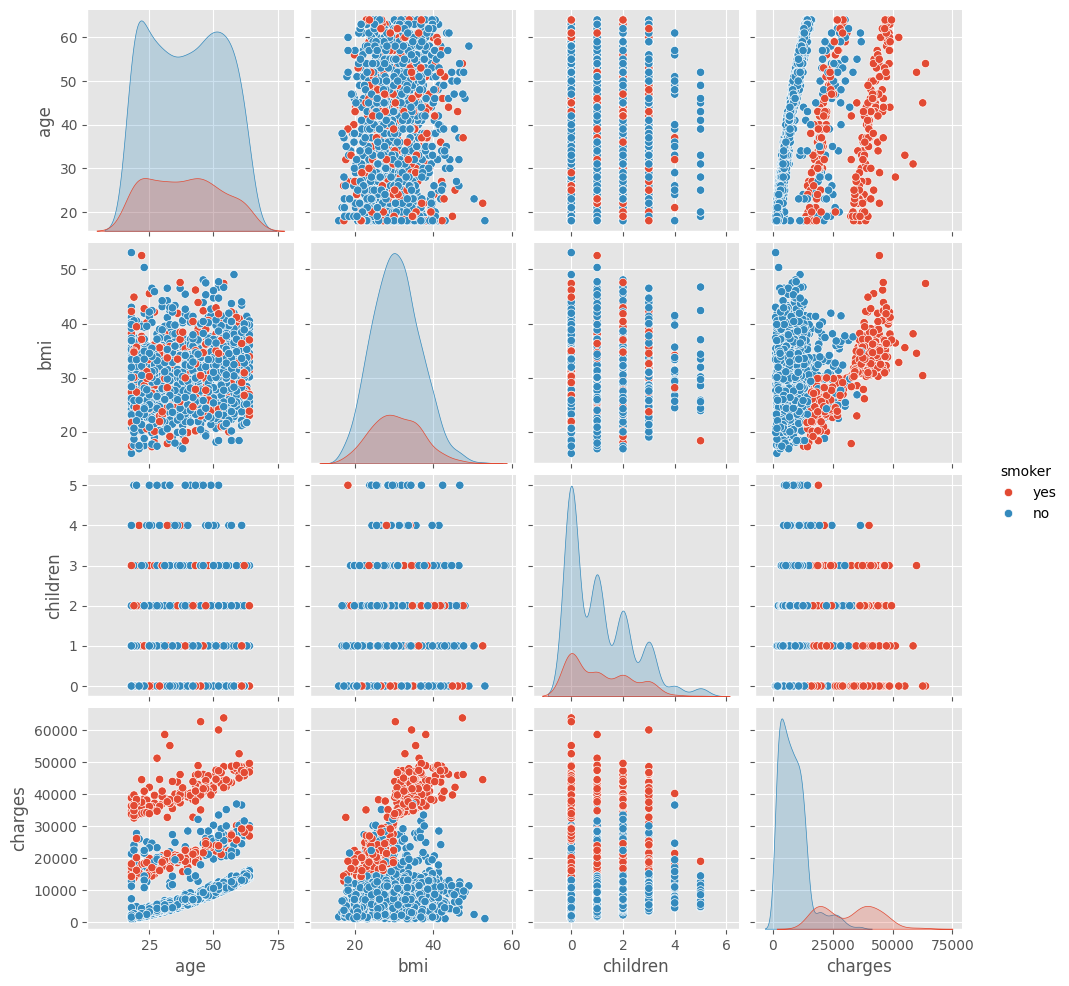

In [ ]:
sns.pairplot(df,vars=['age','bmi', 'children',	'charges'],hue='smoker'	)
plt.show()

###Correlation

In [ ]:
#correlation
df_corr=df[['age','bmi', 'children',	'charges']].dropna().corr()

In [ ]:
fig = px.imshow(
    df_corr,
    text_auto=True,
    color_continuous_scale='reds',
    title='Correlation Heatmap'
)

fig.show()

##Key Insights

- Variables (age, bmi, children, charges) are numeric.

- Age: roughly symmetric, most between 27–51.

- BMI: Mean/median > 30 which means individuals in the dataset are mostly overweight/obese, includes extreme outliers.

- Children: Mostly 0–1 child; 75% have ≤2.

- Charges: Strong right skew (mean > median), some extremely high values which means outliers are present.

- Smoker : imbalance (no>yes)

- Outliers may be caused by severe conditions, smoking, or obesity.

- Outliers may require capping or log transform for modeling.

# Data Preprocessing

#### Handeling outliers

The BMI column contains a few positive outliers that represent real but uncommon values, so we will handle them using capping. in contrast the charges column has many positive outliers and is strongly right-skewed so we will apply a log transformation to reduce skewness and stabilize the distribution.

In [ ]:
df_transformed = df.copy()

Q1 = df_transformed['bmi'].quantile(0.25)
Q3 = df_transformed['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bmi = Q1 - 1.5 * IQR
upper_bmi = Q3 + 1.5 * IQR

df_transformed['bmi_capped'] = np.where(df_transformed['bmi'] > upper_bmi, upper_bmi,
                                        np.where(df_transformed['bmi'] < lower_bmi, lower_bmi, df_transformed['bmi']))

df_transformed['charges_log'] = np.log1p(df_transformed['charges'])

fig = px.box(df_transformed, y='bmi_capped', title="BMI After Capping")
fig.show()

fig = px.box(df_transformed, y='charges_log', title="Charges After Log Transformation")
fig.show()


#### Identifying the features and the goal (target)

In [ ]:
X = df_transformed.iloc[:, :-1]
y = df_transformed.iloc[:, -1]

# feature engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## 1. Create New Features

Create new features to potentially improve model performance

(These new features help capture non-linear relationships and interactions that simple linear models might miss)

In [ ]:
print("Original dataset shape:", df.shape)
print("Original columns:", df.columns.tolist())

Original dataset shape: (1337, 7)
Original columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


1-Create BMI categories (important for health insurance)

 Converts continuous BMI values into categorical groups (underweight, normal, overweight, obese) which might have different relationships with insurance charges

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'
df['bmi_category'] = df['bmi'].apply(bmi_category)
print("\nBMI Categories created:")
print(df['bmi_category'].value_counts())


BMI Categories created:
bmi_category
obese          706
overweight     386
normal         225
underweight     20
Name: count, dtype: int64


2-Create age groups

Groups ages into meaningful categories that might correlate differently with medical costs

In [ ]:
def age_group(age):
    if age < 30:
        return 'young'
    elif 30 <= age < 50:
        return 'middle_age'
    else:
        return 'senior'

df['age_group'] = df['age'].apply(age_group)
print("\nAge Groups created:")
print(df['age_group'].value_counts())





Age Groups created:
age_group
middle_age    536
young         416
senior        385
Name: count, dtype: int64


3-Create interaction features

age bmi and bmi children capture combined effects (e.g., older people with high BMI might have higher costs)

In [ ]:
df['age_bmi_interaction'] = df['age'] * df['bmi']
df['bmi_children_interaction'] = df['bmi'] * df['children']
fig = px.box(df, y='age_bmi_interaction', title="age_bmi_interaction")
fig.show()
fig = px.box(df, y='bmi_children_interaction', title="bmi_children_interaction")
fig.show()

Check if outliers need to be handled in interaction features

In [ ]:
def check_outliers_iqr(series, feature_name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_percentage = (len(outliers) / len(series)) * 100

    print(f"\n{feature_name}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({outlier_percentage:.1f}%)")

    return outliers

age_bmi_outliers= check_outliers_iqr(df['age_bmi_interaction'], 'Age*BMI Interaction')
bmi_children_outliers = check_outliers_iqr(df['bmi_children_interaction'], 'BMI*Children Interaction')

if len(age_bmi_outliers)/len(df) < 0.05:
      print("Outliers are minimal - NO ACTION NEEDED")
else:
      print("Consider log transformation or robust scaling")


Age*BMI Interaction:
  Q1: 765.70, Q3: 1589.28, IQR: 823.58
  Bounds: [-469.67, 2824.65]
  Outliers: 1 (0.1%)

BMI*Children Interaction:
  Q1: 0.00, Q3: 59.84, IQR: 59.84
  Bounds: [-89.76, 149.60]
  Outliers: 10 (0.7%)
Outliers are minimal - NO ACTION NEEDED


4-Create binary flags

has_children and is_overweight create simple yes/no features that can be easier for models to interpret

In [ ]:
df['has_children'] = (df['children'] > 0).astype(int)
df['is_overweight'] = (df['bmi'] >= 25).astype(int)


Display the new features

In [ ]:
print(f"\nNew dataset shape after feature creation: {df.shape}")
print("New columns:", df.columns.tolist())

print("\nSample of new features:")
print(df[['age', 'age_group', 'bmi', 'bmi_category', 'age_bmi_interaction', 'has_children']].head())


New dataset shape after feature creation: (1337, 13)
New columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'bmi_category', 'age_group', 'age_bmi_interaction', 'bmi_children_interaction', 'has_children', 'is_overweight']

Sample of new features:
   age   age_group     bmi bmi_category  age_bmi_interaction  has_children
0   19       young  27.900   overweight              530.100             0
1   18       young  33.770        obese              607.860             1
2   28       young  33.000        obese              924.000             1
3   33  middle_age  22.705       normal              749.265             0
4   32  middle_age  28.880   overweight              924.160             0


## 2. Feature Selection

Prepare data for feature selection

Convert categorical variables to numerical

In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region', 'bmi_category', 'age_group'], drop_first=True)

Separate features and target

In [ ]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

print(f"Features after encoding: {X.shape[1]}")

Features after encoding: 17


### Method 1: Correlation Analysis

Correlation Analysis: Measures linear relationship between each feature and target variable. High correlation suggests strong predictive power

In [ ]:
correlation_with_target = X.corrwith(y).abs().sort_values(ascending=False)
print("Top 10 features by correlation with charges:")
print(correlation_with_target.head(10))

Top 10 features by correlation with charges:
smoker_yes                  0.787234
age_bmi_interaction         0.334184
age                         0.298308
age_group_senior            0.242874
age_group_young             0.226424
bmi_category_obese          0.200347
bmi                         0.198401
bmi_category_overweight     0.120601
is_overweight               0.117260
bmi_children_interaction    0.102024
dtype: float64


Visualize correlations

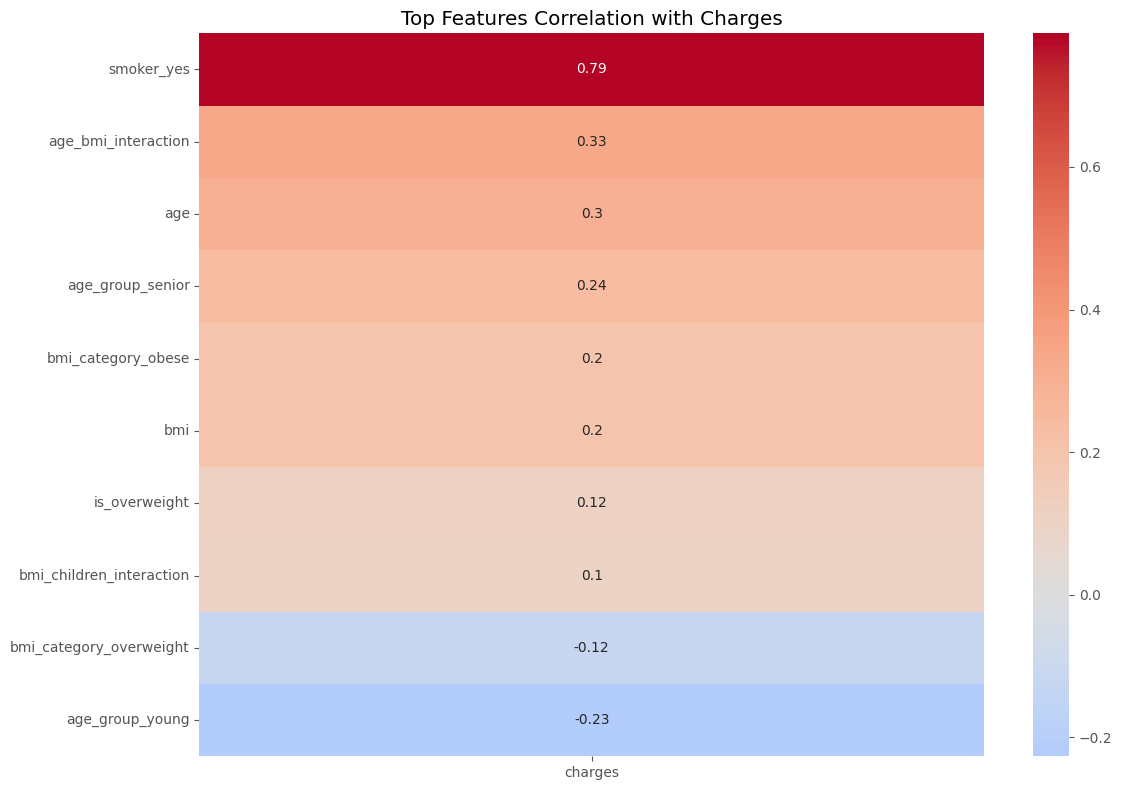

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = pd.concat([X, y], axis=1).corr()
top_features = correlation_with_target.head(10).index
sns.heatmap(correlation_matrix.loc[top_features, ['charges']].sort_values('charges', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Top Features Correlation with Charges')
plt.tight_layout()
plt.show()

### Method 2: Statistical Feature Selection using SelectKBest

SelectKBest with F-regression: Statistical test that evaluates the relationship between each feature and target, selecting the K best features

In [ ]:
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

feature_scores = pd.DataFrame({
    'Feature': selected_features,
    'Score': scores
}).sort_values('Score', ascending=False)

print("Top features by F-score:")
print(feature_scores)

Top features by F-score:
                    Feature        Score
5                smoker_yes  2175.736863
2       age_bmi_interaction   167.835186
0                       age   130.402971
8          age_group_senior    83.685346
9           age_group_young    72.141255
6        bmi_category_obese    55.826064
1                       bmi    54.702715
7   bmi_category_overweight    19.703525
4             is_overweight    18.611961
3  bmi_children_interaction    14.041986


### Select final features based on both methods

In [ ]:
final_features = ['age', 'bmi', 'children', 'smoker_yes', 'age_bmi_interaction',
                  'bmi_children_interaction', 'bmi_category_obese', 'is_overweight']

print(f"\nSelected {len(final_features)} final features:")
print(final_features)


Selected 8 final features:
['age', 'bmi', 'children', 'smoker_yes', 'age_bmi_interaction', 'bmi_children_interaction', 'bmi_category_obese', 'is_overweight']


### Prepare final dataset with selected features

In [ ]:
X_final = df_encoded[final_features]

# Model & Evaluation

## 1-Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1069, 8), Test set: (268, 8)


In [ ]:
scaler = StandardScaler()
numerical_columns = ['age', 'bmi', 'children']

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
print(X_train[numerical_columns].describe())

                age           bmi      children
count  1.069000e+03  1.069000e+03  1.069000e+03
mean   1.678317e-16  1.661700e-17  5.068184e-17
std    1.000468e+00  1.000468e+00  1.000468e+00
min   -1.515026e+00 -2.410382e+00 -9.079080e-01
25%   -8.718037e-01 -7.208494e-01 -9.079080e-01
50%   -1.417350e-02 -5.627791e-02 -7.050192e-02
75%    8.434567e-01  6.430101e-01  7.669042e-01
max    1.772556e+00  3.734425e+00  3.279123e+00


Scale the features (important for polynomial regression)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2-Linear Regression & Polynomial Regression

### Model 1: Simple Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


LinearRegression()

Make predictions

In [ ]:
y_pred_linear = linear_model.predict(X_test_scaled)

### Model 2: Polynomial Regression (Degree 2)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"Original features: {X_train_scaled.shape[1]}")
print(f"After polynomial expansion: {X_train_poly.shape[1]}")
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

Original features: 8
After polynomial expansion: 44


### Model 3: Polynomial Regression (Degree 3)

In [ ]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train_scaled)
X_test_poly3 = poly3.transform(X_test_scaled)
print(f"After polynomial expansion (degree 3): {X_train_poly3.shape[1]}")

poly_model3 = LinearRegression()
poly_model3.fit(X_train_poly3, y_train)
y_pred_poly3 = poly_model3.predict(X_test_poly3)
print("\nModels trained successfully!")

After polynomial expansion (degree 3): 164

Models trained successfully!


## 3-Model Evaluation

Evaluation Metrics:

MAE: Average absolute difference between predictions and actual values (easier to interpret)

MSE: Squares the errors, penalizes large errors more

RMSE: Square root of MSE, in same units as target variable

R²: Proportion of variance explained (0-1, higher is better)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """Comprehensive model evaluation"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"MAE (Mean Absolute Error): ${mae:,.2f}")
    print(f"MSE (Mean Squared Error): ${mse:,.0f}")
    print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
    print(f"R² Score: {r2:.4f}")
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


### Evaluate all models

In [ ]:
linear_metrics = evaluate_model(y_test, y_pred_linear, "Linear Regression")
poly_metrics = evaluate_model(y_test, y_pred_poly, "Polynomial Regression (Degree 2)")
poly3_metrics = evaluate_model(y_test, y_pred_poly3, "Polynomial Regression (Degree 3)")


Linear Regression Performance:
MAE (Mean Absolute Error): $4,316.93
MSE (Mean Squared Error): $36,594,188
RMSE (Root Mean Squared Error): $6,049.31
R² Score: 0.8009

Polynomial Regression (Degree 2) Performance:
MAE (Mean Absolute Error): $2,365.23
MSE (Mean Squared Error): $17,911,060
RMSE (Root Mean Squared Error): $4,232.15
R² Score: 0.9025

Polynomial Regression (Degree 3) Performance:
MAE (Mean Absolute Error): $2,773.06
MSE (Mean Squared Error): $24,500,541
RMSE (Root Mean Squared Error): $4,949.80
R² Score: 0.8667


### Compare models

In [ ]:
comparison = pd.DataFrame({
    'Linear': linear_metrics,
    'Poly_Deg2': poly_metrics,
    'Poly_Deg3': poly3_metrics
})

print("\n=== MODEL COMPARISON ===")
print(comparison)


=== MODEL COMPARISON ===
            Linear     Poly_Deg2     Poly_Deg3
MAE   4.316929e+03  2.365231e+03  2.773065e+03
MSE   3.659419e+07  1.791106e+07  2.450054e+07
RMSE  6.049313e+03  4.232146e+03  4.949802e+03
R2    8.008545e-01  9.025281e-01  8.666681e-01


### Visualization of predictions vs actual

Visualizations:

Prediction vs Actual: Ideal points lie on the red diagonal line

Residual Plots: Should show random scatter around zero (no patterns)

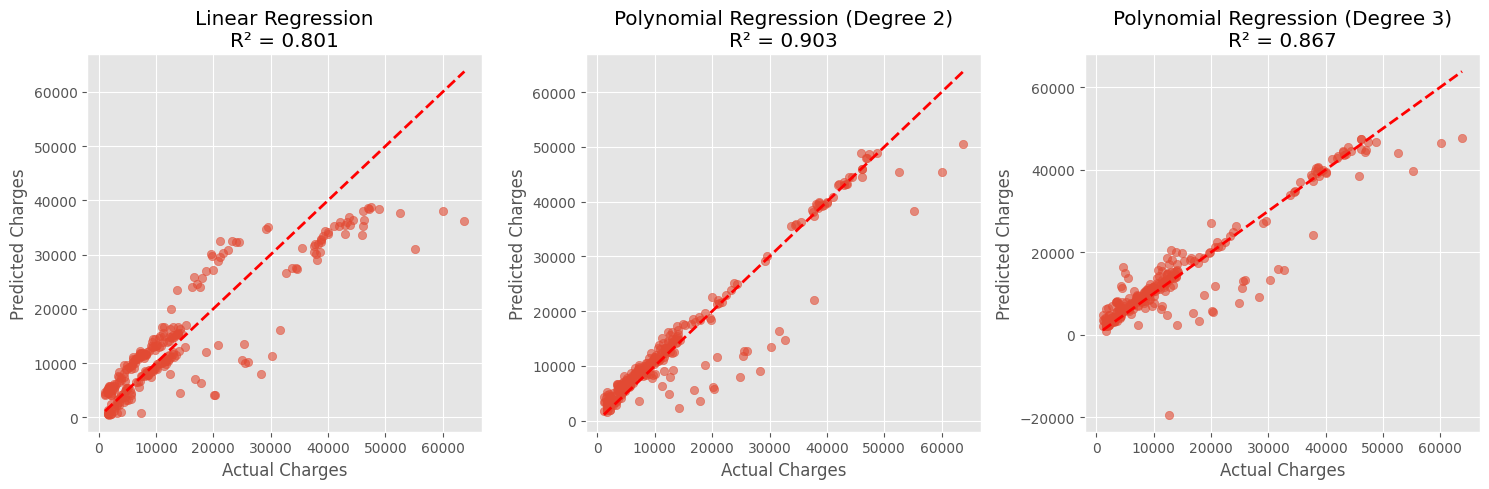

In [ ]:
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Linear Regression\nR² = {linear_metrics["R2"]:.3f}')

# Polynomial Degree 2
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Polynomial Regression (Degree 2)\nR² = {poly_metrics["R2"]:.3f}')

# Polynomial Degree 3
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_poly3, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Polynomial Regression (Degree 3)\nR² = {poly3_metrics["R2"]:.3f}')

plt.tight_layout()
plt.show()

### Residual Analysis

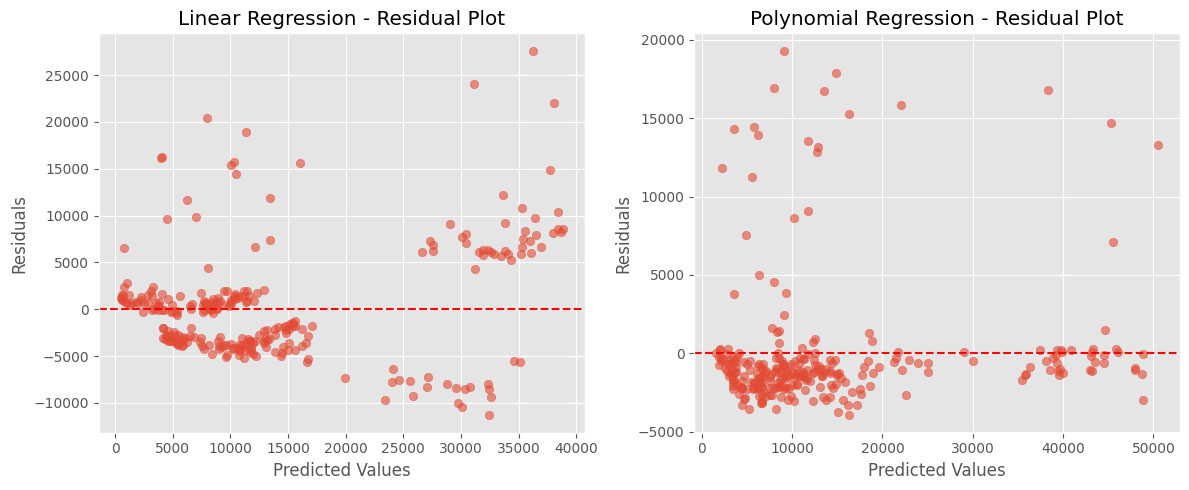

In [ ]:

residuals_linear = y_test - y_pred_linear
residuals_poly = y_test - y_pred_poly

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_linear, residuals_linear, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression - Residual Plot')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_poly, residuals_poly, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Polynomial Regression - Residual Plot')

plt.tight_layout()
plt.show()

### Feature Importance from Linear Model

Feature Importance: Shows which features have the strongest impact on predictions

In [ ]:
feature_importance = pd.DataFrame({
    'feature': final_features,
    'coefficient': linear_model.coef_,
    'abs_coefficient': np.abs(linear_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("\n=== FEATURE IMPORTANCE (Linear Model) ===")
print(feature_importance)


=== FEATURE IMPORTANCE (Linear Model) ===
                    feature  coefficient  abs_coefficient
3                smoker_yes  9226.183956      9226.183956
0                       age  3910.614331      3910.614331
5  bmi_children_interaction  2078.258038      2078.258038
6        bmi_category_obese  1670.900382      1670.900382
2                  children -1367.710691      1367.710691
4       age_bmi_interaction  -512.020397       512.020397
1                       bmi   330.129851       330.129851
7             is_overweight    63.767605        63.767605


Key Insights:

Polynomial regression typically performs better when relationships are non-linear

Higher degrees can overfit (perform well on training but poorly on test data)

The best model balances complexity and performance

### Final results for this model

In [ ]:
best_model = max([('Linear', linear_metrics['R2']),
                  ('Poly_Deg2', poly_metrics['R2']),
                  ('Poly_Deg3', poly_metrics['R2'])],
                 key=lambda x: x[1])
print(f"Best performing model: {best_model[0]} with R² = {best_model[1]:.4f}")
print(f"This model explains {best_model[1]*100:.1f}% of the variance in insurance charges")
if best_model[0].startswith('Poly'):
    print("Polynomial features successfully captured non-linear relationships!")
else:
    print("Linear relationships were sufficient for this dataset.")

Best performing model: Poly_Deg2 with R² = 0.9025
This model explains 90.3% of the variance in insurance charges
Polynomial features successfully captured non-linear relationships!


# Final Model Accuracy : Linear Regression

In [ ]:
best_model_name, best_model_r2 = best_model
best_model_mae = poly_metrics['MAE'] if best_model_name == 'Poly_Deg2' else (linear_metrics['MAE'] if best_model_name == 'Linear' else poly3_metrics['MAE'])
accuracy = (best_model_r2 * 100 + (100 - (best_model_mae / 13270.42 * 100))) / 2
print(f"Final Model Accuracy: {accuracy:.1f}%")

Final Model Accuracy: 86.2%


#KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [1,3, 5, 7, 9, 11, 13, 15 , 17 ,19],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [ ]:
best_params= grid_search.best_params_
best_params

{'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}

In [ ]:
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, r2_score

print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R2:", r2_score(y_test, y_pred))

Test MAE: 2585.7609973669155
Test R2: 0.8815177174510654


In [ ]:
knn_model= grid_search.best_estimator_
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
knn_metrics=evaluate_model(y_test, y_pred_knn, "KNN Regression")


KNN Regression Performance:
MAE (Mean Absolute Error): $2,585.76
MSE (Mean Squared Error): $21,771,838
RMSE (Root Mean Squared Error): $4,666.03
R² Score: 0.8815


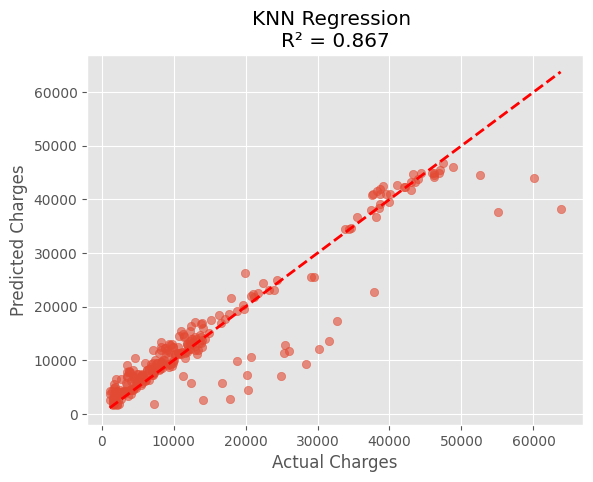

In [ ]:

plt.scatter(y_test, y_pred_knn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'KNN Regression \nR² = {poly3_metrics["R2"]:.3f}')
plt.show()

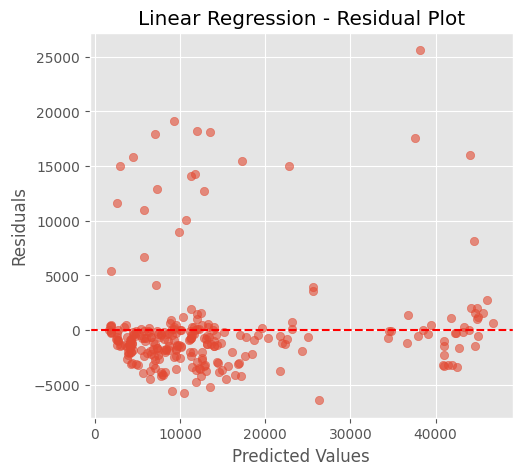

In [ ]:
residuals_knn = y_test - y_pred_knn

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_knn, residuals_knn, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression - Residual Plot')
plt.show()

#Final Model Accuracy: KNN Regressor

In [ ]:

knn_model_mae = knn_metrics['MAE']
knn_model_r2 = knn_metrics['R2']
accuracy = (knn_model_r2 * 100 + (100 - (knn_model_mae / 13270.42 * 100))) / 2
print(f"Final Model Accuracy: {accuracy:.1f}%")

Final Model Accuracy: 84.3%
